# IPython: beyond plain Python

When executing code in IPython, all valid Python syntax works as-is, but IPython provides a number of features designed to make the interactive experience more fluid and efficient.

## First things first: running code, getting help

In the notebook, to run a cell of code, hit `Shift-Enter`. This executes the cell and puts the cursor in the next cell below, or makes a new one if you are at the end.  Alternately, you can use:
    
- `Alt-Enter` to force the creation of a new cell unconditionally (useful when inserting new content in the middle of an existing notebook).
- `Control-Enter` executes the cell and keeps the cursor in the same cell, useful for quick experimentation of snippets that you don't need to keep permanently.

In [78]:
print("Hi")

Hi


Getting help:

In [79]:
?

Typing `object_name?` will print all sorts of details about any object, including docstrings, function definition lines (for call arguments) and constructor details for classes.

In [80]:
import collections
collections.namedtuple?

In [81]:
collections.Counter??

In [82]:
*int*?

An IPython quick reference card:

In [83]:
%quickref

## Tab completion

Tab completion, especially for attributes, is a convenient way to explore the structure of any object you’re dealing with. Simply type `object_name.<TAB>` to view the object’s attributes. Besides Python objects and keywords, tab completion also works on file and directory names.

In [84]:
collections.OrderedDict

collections.OrderedDict

## The interactive workflow: input, output, history

In [85]:
2+10

12

In [86]:
_+10

22

You can suppress the storage and rendering of output if you append `;` to the last cell (this comes in handy when plotting with matplotlib, for example):

In [87]:
10+20;

In [88]:
_

22

The output is stored in `_N` and `Out[N]` variables:

In [89]:
_10 == Out[10]

True

Previous inputs are available, too:

In [90]:
In[11]

'_+10'

In [91]:
_i

'In[11]'

In [92]:
%history -n 1-5

   1: print("Hi")
   2: ?
   3:
import collections
collections.namedtuple?
   4: *int*?
   5: %quickref


**Exercise**

Use `%history?` to have a look at `%history`'s magic documentation, and write the last 10 lines of history to a file named `log.py`.

In [1]:
%history -l 10 -f log.py

File 'log.py' exists. Overwrite? yes
Overwriting file.


## Accessing the underlying operating system

In [2]:
!pwd

/home/cms3504user/Documents/ipython-in-depth


In [3]:
files = !ls notebooks
print("files in notebooks directory:")
print(files)

files in notebooks directory:
['bqplot demo.ipynb', 'Data.ipynb', 'Fasta.ipynb', 'Lorenz.ipynb', 'lorenz.py']


In [4]:
!echo $files

[bqplot demo.ipynb, Data.ipynb, Fasta.ipynb, Lorenz.ipynb, lorenz.py]


In [5]:
!echo {files[0].upper()}

BQPLOT DEMO.IPYNB


Note that all this is available even in multiline blocks:

In [6]:
import os
for i,f in enumerate(files):
    if f.endswith('ipynb'):
        !echo {"%02d" % i} - "{os.path.splitext(f)[0]}"
    else:
        print('--')

00 - bqplot demo
01 - Data
02 - Fasta
03 - Lorenz
--


## Beyond Python: magic functions

The IPyhton 'magic' functions are a set of commands, invoked by prepending one or two `%` signs to their name, that live in a namespace separate from your normal Python variables and provide a more command-like interface.  They take flags with `--` and arguments without quotes, parentheses or commas. The motivation behind this system is two-fold:
    
- To provide an orthogonal namespace for controlling IPython itself and exposing other system-oriented functionality.

- To expose a calling mode that requires minimal verbosity and typing while working interactively.  Thus the inspiration taken from the classic Unix shell style for commands.

In [7]:
%magic

Line vs cell magics:

In [8]:
%timeit list(range(1000))

69.4 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
%%timeit
list(range(10))
list(range(100))

5.97 µs ± 932 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Line magics can be used even inside code blocks:

In [10]:
for i in range(1, 5):
    size = i*100
    print('size:', size, end=' ')
    %timeit list(range(size))

size: 100 3.67 µs ± 462 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
size: 200 7.41 µs ± 1.61 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
size: 300 11.6 µs ± 1.73 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
size: 400 17.6 µs ± 1.66 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Magics can do anything they want with their input, so it doesn't have to be valid Python:

In [12]:
%%bash
echo "My shell is:" $SHELL
echo "My disk usage is:"
df -h

My shell is: /bin/bash
My disk usage is:
Filesystem               Size  Used Avail Use% Mounted on
/dev/mapper/centos-root   17G  6.3G   11G  37% /
devtmpfs                 480M     0  480M   0% /dev
tmpfs                    496M   39M  457M   8% /dev/shm
tmpfs                    496M  7.7M  488M   2% /run
tmpfs                    496M     0  496M   0% /sys/fs/cgroup
/dev/sda1               1014M  206M  809M  21% /boot
tmpfs                    100M  4.0K  100M   1% /run/user/42
tmpfs                    100M   40K  100M   1% /run/user/1000
/dev/sr0                  56M   56M     0 100% /run/media/cms3504user/VBox_GAs_5.2.20


Another interesting cell magic: create any file you want locally from the notebook:

In [13]:
%%writefile test.txt
This is a test file!
It can contain anything I want...

And more...

Writing test.txt


In [14]:
!cat test.txt

This is a test file!
It can contain anything I want...

And more...


Let's see what other magics are currently defined in the system:

In [15]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [4]:
def to_optimize(N):
    total = [0,0]
    ta = 0
    tb = 0
    for i in range(N):
        for j in range(N):
            a = i**2
            b = j*2
            total[0] +=  a
            total[1] +=  b
    return total

In [5]:
%timeit to_optimize(1_000)

402 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%prun to_optimize(1_000)

         4 function calls in 0.432 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.432    0.432    0.432    0.432 <ipython-input-4-3d4a58aab281>:1(to_optimize)
        1    0.000    0.000    0.432    0.432 {built-in method builtins.exec}
        1    0.000    0.000    0.432    0.432 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [1]:
%load_ext line_profiler

In [7]:
%lprun -f to_optimize to_optimize(1_000)

Timer unit: 2.55489e-07 s

Total time: 1.8216 s
File: <ipython-input-4-3d4a58aab281>
Function: to_optimize at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def to_optimize(N):
     2         1         22.0     22.0      0.0      total = [0,0]
     3         1          2.0      2.0      0.0      ta = 0
     4         1          1.0      1.0      0.0      tb = 0
     5      1001       1083.0      1.1      0.0      for i in range(N):
     6   1001000    1039816.0      1.0     14.6          for j in range(N):
     7   1000000    2117733.0      2.1     29.7              a = i**2
     8   1000000    1185175.0      1.2     16.6              b = j*2
     9   1000000    1415360.0      1.4     19.9              total[0] +=  a
    10   1000000    1370690.0      1.4     19.2              total[1] +=  b
    11         1          2.0      2.0      0.0      return total

## Running normal Python code: execution and errors

Not only can you input normal Python code, you can even paste straight from a Python or IPython shell session:

In [8]:
>>> # Fibonacci series:
... # the sum of two elements defines the next
... a, b = 0, 1
>>> while b < 10:
...     print(b)
...     a, b = b, a+b

1
1
2
3
5
8


In [9]:
In [1]: for i in range(10):
   ...:     print(i, end=' ')
   ...:     

0 1 2 3 4 5 6 7 8 9 

And when your code produces errors, you can control how they are displayed with the `%xmode` magic:

In [10]:
%%writefile mod.py

def f(x):
    return 1.0/(x-1)

def g(y):
    return f(y+1)

Writing mod.py


Now let's call the function `g` with an argument that would produce an error:

In [11]:
import mod
mod.g(0)

ZeroDivisionError: float division by zero

In [12]:
%xmode plain
mod.g(0)

Exception reporting mode: Plain


ZeroDivisionError: float division by zero

In [13]:
%xmode verbose
mod.g(0)

Exception reporting mode: Verbose


ZeroDivisionError: float division by zero

The default `%xmode` is "context", which shows additional context but not all local variables.  Let's restore that one for the rest of our session.

In [14]:
%xmode context

Exception reporting mode: Context


## Running code in other languages with special `%%` magics

In [1]:
%%perl
@months = ("July", "August", "September");
print $months[0];

July

In [4]:
%%ruby
name = "world"
puts "Hello #{name.capitalize}!"

Hello World!


## Raw Input in the notebook

Since 1.0 the IPython notebook web application support `raw_input` which for example allow us to invoke the `%debug` magic in the notebook:

In [16]:
mod.g(0)

ZeroDivisionError: float division by zero

In [17]:
%debug

> z:\bda\week 1\ipython-in-depth\mod.py(3)f()
      1 
      2 def f(x):
----> 3     return 1.0/(x-1)
      4 
      5 def g(y):



ipdb>  EXIT


*** NameError: name 'EXIT' is not defined


ipdb>  exit


Don't foget to exit your debugging session. Raw input can of course be use to ask for user input:

In [18]:
enjoy = input('Are you enjoying this tutorial? ')
print('enjoy is:', enjoy)

Are you enjoying this tutorial?  yes


enjoy is: yes


## Plotting in the notebook

This magic configures matplotlib to render its figures inline:

In [19]:
%matplotlib inline

In [20]:
import numpy as np
import matplotlib.pyplot as plt

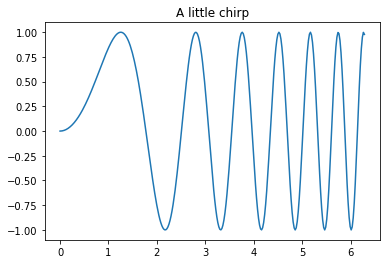

In [21]:
x = np.linspace(0, 2*np.pi, 300)
y = np.sin(x**2)
plt.plot(x, y)
plt.title("A little chirp")
fig = plt.gcf()  # let's keep the figure object around for later...

# Ventures into widgets

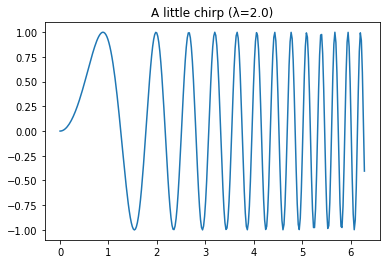

In [22]:
from ipywidgets import interact, interact_manual

@interact(color=['C0','C1', 'C2'], f={'sine': np.sin, 'cos': np.cos})
def myplot(f, λ=2.0, color='C0'):
    x = np.linspace(0, 2*np.pi, 300)
    y = f(λ*x**2)
    plt.plot(x, y, c=color)
    plt.title(f"A little chirp (λ={λ})")
    